<a href="https://colab.research.google.com/github/Kai-Infernus/pune_house_rent_prediction/blob/main/Pune_rent_predictions_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [609]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
%matplotlib inline

# Importing the dataset

Data [Pune House Rent Prediction](https://www.kaggle.com/datasets/rahulmishra5/pune-house-rent-prediction)

In [610]:
!wget https://raw.githubusercontent.com/Kai-Infernus/pune_house_rent_prediction/main/Pune_rent.csv

--2022-04-14 07:56:37--  https://raw.githubusercontent.com/Kai-Infernus/pune_house_rent_prediction/main/Pune_rent.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1403750 (1.3M) [text/plain]
Saving to: ‘Pune_rent.csv.20’

Pune_rent.csv.20    100%[===================>]   1.34M  --.-KB/s    in 0.05s   

2022-04-14 07:56:37 (24.6 MB/s) - ‘Pune_rent.csv.20’ saved [1403750/1403750]



In [611]:
data = pd.read_csv('Pune_rent.csv')

# Data Observation

In [612]:
data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2


In [613]:
data = pd.read_csv('Pune_rent.csv')

# Data Observation

In [614]:
data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2


In [615]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22800 non-null  object
 1   bedroom        22800 non-null  int64 
 2   layout_type    22800 non-null  object
 3   property_type  22800 non-null  object
 4   locality       22800 non-null  object
 5   price          22800 non-null  object
 6   area           22800 non-null  int64 
 7   furnish_type   22800 non-null  object
 8   bathroom       22629 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB


In [616]:
for column in data.columns:
  print(data[column].value_counts())
  print("*"*20)

AGENT      16271
OWNER       6097
BUILDER      432
Name: seller_type, dtype: int64
********************
2    10612
1     7925
3     3566
4      626
5       66
6        3
8        2
Name: bedroom, dtype: int64
********************
BHK    21726
RK      1074
Name: layout_type, dtype: int64
********************
Apartment            20172
Studio Apartment      1074
Independent House      912
Independent Floor      353
Villa                  278
Penthouse               11
Name: property_type, dtype: int64
********************
Wagholi           2169
Hinjewadi         1457
Wakad             1259
Kharadi           1220
Hadapsar          1135
                  ... 
Sindhi Colony        1
Kalwad               1
Baderaj Colony       1
Marunji Road         1
Aundh Gaon           1
Name: locality, Length: 459, dtype: int64
********************
15,000    1241
18,000    1156
12,000    1089
20,000    1002
16,000     969
          ... 
76,843       1
1.29         1
1.17         1
1.09         1
13,250  

# Cleaning the data

**Null values in Bathroom Column**

In [617]:
data.isna().sum()

seller_type        0
bedroom            0
layout_type        0
property_type      0
locality           0
price              0
area               0
furnish_type       0
bathroom         171
dtype: int64

**Removing the null values and converting to int**

In [618]:
values = ['1','2','3','4','5','6']
data = data[data.bathroom.isin(values) == True]
print(data['bathroom'].value_counts())

2    11184
1     7598
3     3103
4      569
5      126
6       15
Name: bathroom, dtype: int64


In [619]:
data['bathroom'] = data['bathroom'].astype(int)
data

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2
...,...,...,...,...,...,...,...,...,...
22795,OWNER,1,BHK,Apartment,Chinchwad,"13,250",650,Semi-Furnished,1
22796,OWNER,1,RK,Studio Apartment,Wadgaon Sheri,"7,000",350,Unfurnished,1
22797,OWNER,1,BHK,Apartment,Kothrud,"8,500",389,Semi-Furnished,1
22798,AGENT,1,BHK,Apartment,Wakad,"16,500",670,Semi-Furnished,2


**We'll convert the price column into integer.**

In [620]:
data['price'] = data['price'].astype(str).replace(',', '')
data['price'] = data['price'].apply(lambda x: x.replace(',','')).astype('float')
data['price'] = data['price'].astype(int)
data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750,450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,18000,916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,16500,1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,8000,250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,25000,1005,Semi-Furnished,2


In [621]:
location_count = data['locality'].value_counts()
location_count_less_than_10 = location_count[location_count<=10]
location_count_less_than_10

maharshi nagar          10
Mukund Nagar            10
Pimpri Chinchwad        10
Dehu Road Cantonment     9
Sanaswadi                9
                        ..
Sindhi Colony            1
Kalwad                   1
Baderaj Colony           1
Marunji Road             1
Aundh Gaon               1
Name: locality, Length: 332, dtype: int64

In [622]:
data['locality'] = data['locality'].apply(lambda x: 'OTHERS' if x in location_count_less_than_10 else x)

In [623]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22595 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22595 non-null  object
 1   bedroom        22595 non-null  int64 
 2   layout_type    22595 non-null  object
 3   property_type  22595 non-null  object
 4   locality       22595 non-null  object
 5   price          22595 non-null  int64 
 6   area           22595 non-null  int64 
 7   furnish_type   22595 non-null  object
 8   bathroom       22595 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.7+ MB


# **Visualising the data and removing the outliers**

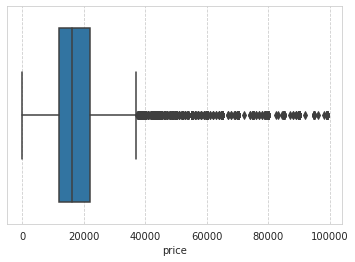

In [624]:
sns.boxplot(data=data,x='price');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


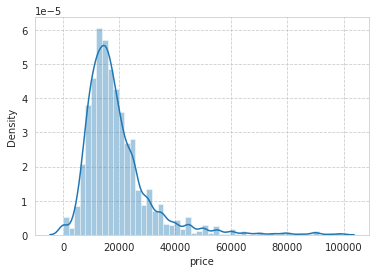

In [625]:
sns.distplot(data["price"])

In [626]:
a = data[data['price'] < 1000].index
data.drop(a,inplace=True)
data = data[data['price'] <= 35000]

Text(0, 0.5, 'Price')

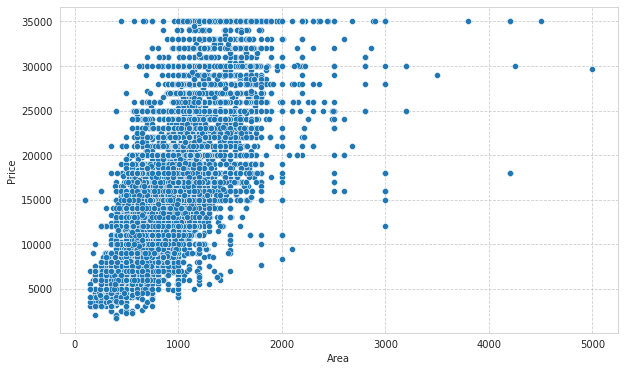

In [627]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "area", y = "price", data = data)
plt.xlabel("Area")
plt.ylabel("Price")

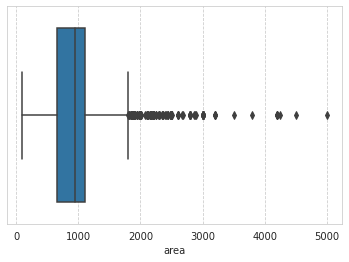

In [628]:
sns.boxplot(data=data,x='area');

In [629]:
data = data[data['area'] <= 1800]

Text(0, 0.5, 'Price')

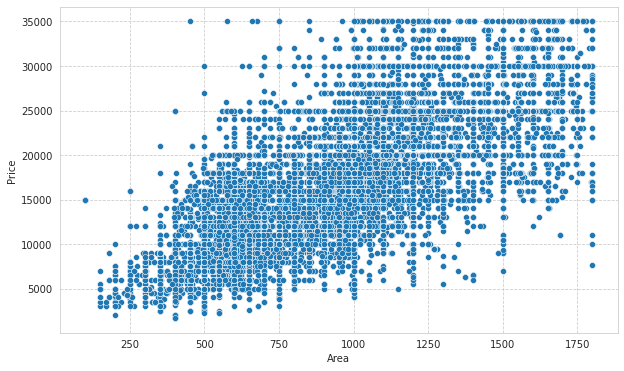

In [630]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "area", y = "price", data = data)
plt.xlabel("Area")
plt.ylabel("Price")

 Drop outliers of price value and area

In [631]:
data = data.drop(data[(data.area<250) & (data.price>15000)].index)
data = data.drop(data[(data.area<500) & (data.price==35000)].index)
data = data.drop(data[(data.area<500) & (data.price==25000)].index)
data = data.drop(data[(data.area<=750) & (data.price==35000)].index)
data = data.drop(data[(data.area==500) & (data.price>25000) ].index)
data = data.drop(data[(data.area>1750) & (data.price>=10000) & (data.price<15000)].index)
data = data.drop(data[(data.area>750) & (data.area<1000) & (data.price<5000)].index)
data = data.drop(data[(data.area==250) & (data.price>15000)].index)
data = data.drop(data[(data.area<500) & (data.price>20000)].index)
data = data.drop(data[(data.area>1750) & (data.price<10000)].index)
data = data.drop(data[(data.area<800) & (data.price>35000)].index)

Text(0, 0.5, 'Price')

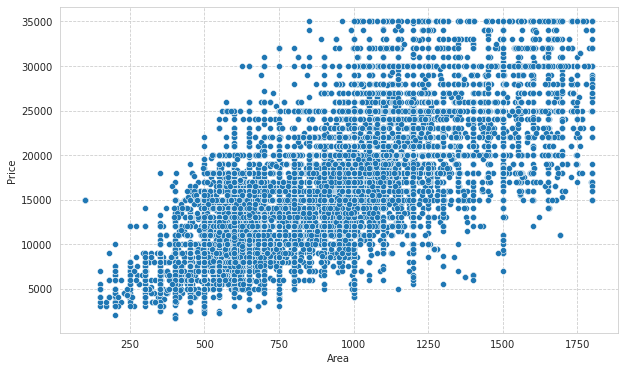

In [632]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "area", y = "price", data = data)
plt.xlabel("Area")
plt.ylabel("Price")

# Cleaned Data

In [633]:
data.to_csv("Cleaned_data.csv")

In [634]:
X = data.drop(columns=['price'])
y = data['price']

In [635]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

# Applying Linear Regression

In [636]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7801566217601333
MAE 2407.1473160067576


In [637]:
y_pred = pipe.predict(X_test)
yt_pred = pipe.predict(X_train)

print('Predicted Value for model is : \n' ,list(y_pred[:5]))
print('real Value for model is : \n' , y_test[:5])

Predicted Value for model is : 
 [18788.492256662088, 9573.413670311344, 10571.422611961734, 11850.382935067848, 6201.466147452034]
real Value for model is : 
 3837     19000
21985     9000
14776    10000
18807    10540
16326     8000
Name: price, dtype: int64


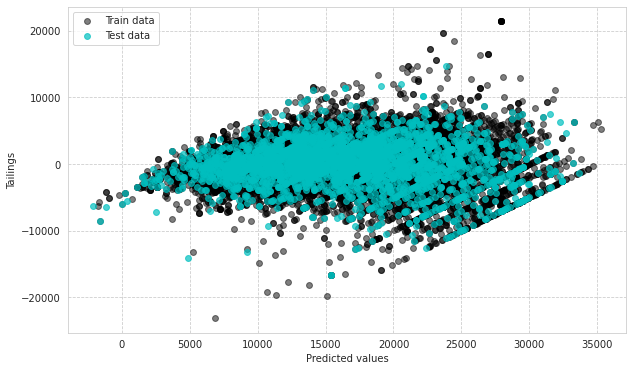

In [638]:
plt.figure(figsize=(10,6))

plt.scatter(yt_pred,yt_pred - y_train,c = 'black', marker = 'o', s = 35, alpha = 0.5,label = 'Train data')
plt.scatter(y_pred,y_pred - y_test, c = 'c', marker = 'o', s = 35, alpha = 0.7,label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.show()

In [639]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test,y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred))) 

MAE: 2407.1473160067576
MSE: 10244162.693212492
RMSE: 3200.6503547267534


**Regression Evaluation Metrics**

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
**Mean Squared Error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

MAE is the easiest to understand because it’s the average error.
MSE is more popular than MAE because MSE “punishes” larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE because RMSE is interpretable in the “y” units.

Source: [StudyGyaan](https://studygyaan.com/data-science-ml/linear-regression-machine-learning-project-for-house-price-prediction)

Thank You for visiting my work ! ( ͡◑ ͜ʖ ͡◑)